In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
import scipy.signal as sgnl
from scipy.signal import butter, lfilter
from scipy.io.wavfile import read  
from scipy.io import loadmat
from IPython.lib.display import Audio

pi = np.pi

In [4]:
Fs, x = read("nito.wav")

In [5]:
print(x.shape) # x'in boyut bilgisi
print("Sampling Frequency: ",Fs)

(342016, 2)
Sampling Frequency:  44100


In [6]:
xn = x[:,1] # x'in sadece ilk sütunundaki örnekler alınmıştır (1. kanalın örnekleri)
print("x[n]'in maksimum genliği'",np.max(np.abs(xn)))

x[n]'in maksimum genliği' 32767


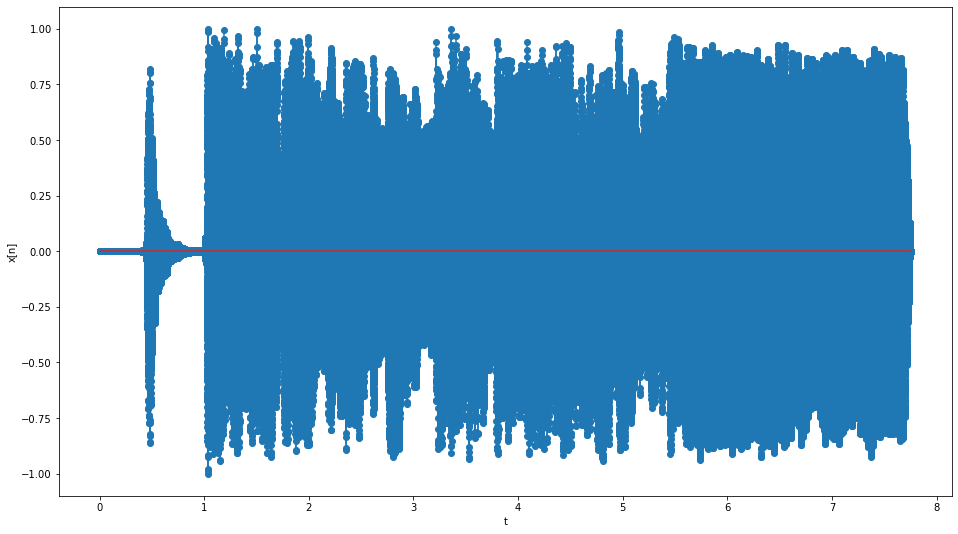

In [7]:
N = len(x)
n=np.arange(0,N) # örnekleme indisinin 0'dan iki periyot olacak şekilde array olarak tanımlanması
xw = fftshift(fft(xn))
              
w=np.linspace(-pi,pi-(2*pi/N),N) 


def plotWaveform(xn,n,Fs):
    plt.figure(figsize = (16,9))
    plt.stem(n/Fs,xn) # zaman cinsinden belirtmek için n/Fs yapılmıştır.
    plt.xlabel("t") 
    plt.ylabel("x[n]") 

# plotWaveform(xn,n,Fs)

def plotSpectrum(xw,w):
    plt.figure(figsize = (16,9))
    plt.stem(w/pi,np.abs(xf)) 
    plt.xlabel("w") 
    plt.ylabel("x[n]") 

xn = xn/32767
plotWaveform(xn,n,Fs)
# plotSpectrum(xw,w)

In [8]:
print('x[n] işareti için:')
display(Audio(xn,rate = Fs))

x[n] işareti için:


In [9]:
filter_data = loadmat('FIR_LPF.mat') 
Coeffs = filter_data['ba'].astype(np.float) 
b = Coeffs[0,:]

In [10]:
yn = sgnl.lfilter(b, 1 ,xn)

In [11]:
print('y[n] işareti için:')
display(Audio(yn, rate=Fs))

y[n] işareti için:


## Distortion/Fuzz

A non-linear function commonly used to simulate distortion:
$f(x) = \frac{x}{|x|}(1-e^{ \alpha x^2/|x|})$ 


In [12]:
def distortion(x, gain, mix):
    q=x*gain/np.max(np.abs(x));
    z=np.sign(-q)*(1-np.exp(np.sign(-q)*q));
    y=mix*z*np.max(np.abs(x))/np.max(np.abs(z))+(1-mix)*x;
    y=y*np.max(abs(x))/np.max(np.abs(y));
    return y

In [13]:
gain = 1
mix = 1
yn = distortion(xn,gain,mix)

In [14]:
print(yn)

[0.         0.         0.         ... 0.00028965 0.00024138 0.00019311]


In [15]:
print('y[n] işareti için:')
display(Audio(yn, rate=Fs))

y[n] işareti için:


## Wah-wah (???)

In [72]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [73]:
filter_data = loadmat('FIR_BP_WahWah.mat') 
Coeffs = filter_data['ba'].astype(np.float) 
b = Coeffs[0,:]

In [74]:
yn = butter_bandpass_filter(xn,500,3000,Fs,order = 6)

In [71]:
print('y[n] işareti için:')
display(Audio(yn, rate=Fs))

y[n] işareti için:


## Panning

## Bass and Treble
